<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Tasa_de_Fallecidos_por_Comuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [0]:
data_raw = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto2/2020-04-15-CasosConfirmados.csv', 
    index_col='Region')

In [0]:
data_Metropolitana = data_raw.loc['Metropolitana'].set_index('Comuna').copy()

In [0]:
data = data_Metropolitana.loc[['Buin', 'Cerrillos', 'Cerro Navia', 'Conchali', 'El Bosque', 'Independencia',
                        'La Florida', 'La Granja', 'La Reina', 'Las Condes', 'Lo Barnechea', 'Lo Prado',
                        'Maipu', 'Nunoa', 'Pedro Aguirre Cerda', 'Penalolen', 'Providencia', 'Puente Alto',
                        'Renca', 'San Miguel', 'Santiago']]

In [0]:
data['Fallecidos confirmados'] = np.array([2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 2, 3, 2, 2, 8, 1, 2, 4])

In [0]:
data = data.drop(columns=['Codigo region', 'Codigo comuna'])

In [7]:
data['Fallecidos confirmados'].sum()

43

In [8]:
data['Tasa de fallecidos confirmados'] = 100000*data['Fallecidos confirmados']/data['Poblacion']
data

,Poblacion,Casos Confirmados,Fallecidos confirmados,Tasa de fallecidos confirmados
Comuna,,,,
Buin,109641.0,40,2,1.824135
Cerrillos,88956.0,39,1,1.124151
Cerro Navia,142465.0,65,1,0.701927
Conchali,139195.0,56,1,0.718417
El Bosque,172000.0,93,1,0.581395
Independencia,142065.0,60,1,0.703903
La Florida,402433.0,176,3,0.745466
La Granja,122557.0,51,1,0.815947
La Reina,100252.0,56,1,0.997486


In [0]:
data['Tasa de letalidad'] = 100*data['Fallecidos confirmados']/data['Casos Confirmados'].astype(int)

In [10]:
data

,Poblacion,Casos Confirmados,Fallecidos confirmados,Tasa de fallecidos confirmados,Tasa de letalidad
Comuna,,,,,
Buin,109641.0,40,2,1.824135,5.000000
Cerrillos,88956.0,39,1,1.124151,2.564103
Cerro Navia,142465.0,65,1,0.701927,1.538462
Conchali,139195.0,56,1,0.718417,1.785714
El Bosque,172000.0,93,1,0.581395,1.075269
Independencia,142065.0,60,1,0.703903,1.666667
La Florida,402433.0,176,3,0.745466,1.704545
La Granja,122557.0,51,1,0.815947,1.960784
La Reina,100252.0,56,1,0.997486,1.785714


In [0]:
def my_plot(column_name):
#  data = data.sort_values(by=column_name, ascending=True)
  data[column_name].plot(kind='barh', ax=ax, color='C1', fontsize='x-large')
  for i, val in enumerate(data[column_name]):
    ax.text(val, i-0.1, f" {val:.0f}", fontsize='large')
  ax.set_xlabel(f'{column_name}', fontsize='x-large')
  ax.set_ylabel(f'Comuna', fontsize='x-large')
  fig.tight_layout()
  plt.annotate('Sources:\nhttps://github.com/MinCiencia/Datos-COVID19\nInforme Epidemiológico COVID-19, Ministerio de Salud.', (0,0), (-120,-30), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')

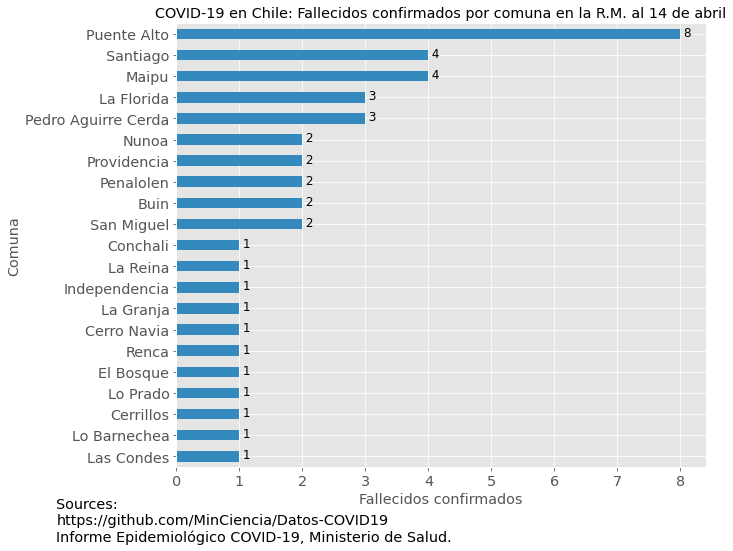

In [17]:
data = data.sort_values(by='Fallecidos confirmados', ascending=True)
fig, ax = plt.subplots(figsize=(10,7))
my_plot('Fallecidos confirmados')
ax.set_title(f'COVID-19 en Chile: Fallecidos confirmados por comuna en la R.M. al 14 de abril', fontsize='x-large')
plt.savefig("2020-04-17-COVID-19-Chile-Fallecidos-Confirmados-por-Comuna.png", format='png', bbox_inches='tight', dvi=1200)

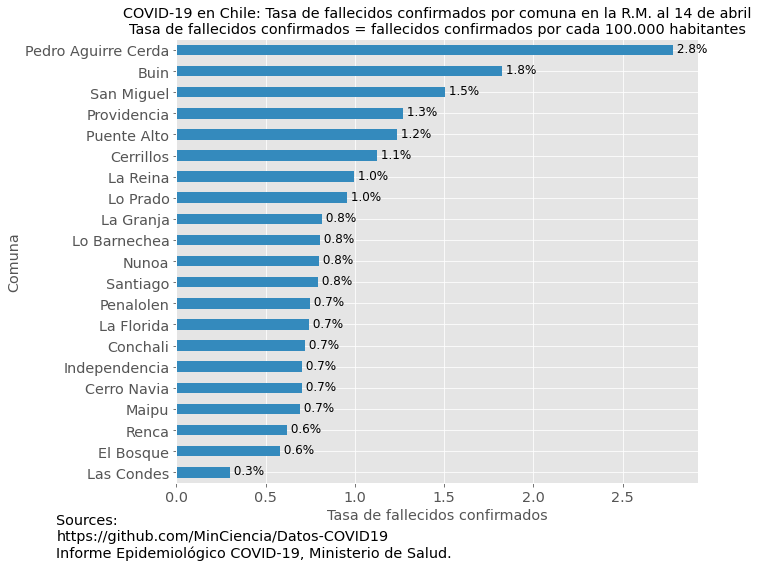

In [13]:
data = data.sort_values(by='Tasa de fallecidos confirmados', ascending=True)
fig, ax = plt.subplots(figsize=(10,7))
my_plot('Tasa de fallecidos confirmados')
ax.set_title(f'COVID-19 en Chile: Tasa de fallecidos confirmados por comuna en la R.M. al 14 de abril\nTasa de fallecidos confirmados = fallecidos confirmados por cada 100.000 habitantes', fontsize='x-large')
plt.savefig("2020-04-17-COVID-19-Chile-Tasa-de-Fallecidos-Confirmados-por-Comuna.png", format='png', bbox_inches='tight', dvi=1200)

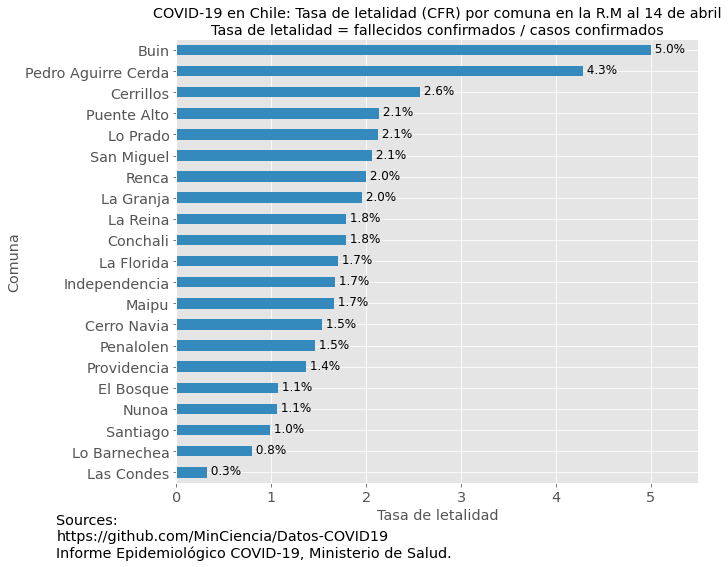

In [14]:
data = data.sort_values(by='Tasa de letalidad', ascending=True)
fig, ax = plt.subplots(figsize=(10,7))
my_plot('Tasa de letalidad')
plt.xlim(0,5.5)
ax.set_title(f'COVID-19 en Chile: Tasa de letalidad (CFR) por comuna en la R.M al 14 de abril\nTasa de letalidad = fallecidos confirmados / casos confirmados', fontsize='x-large')
plt.savefig("2020-04-17-COVID-19-Chile-Tasa-de-Letalidad-por-Comuna.png", format='png', bbox_inches='tight', dvi=1200)

In [0]:
from google.colab import files
files.download("2020-04-17-COVID-19-Chile-Fallecidos-Confirmados-por-Comuna.png")